In [1]:
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv('flipkart_reviews_dataset.csv')

In [3]:
df

,product_title,rating,summary,review
0,Mivi DuoPods M30 earbuds with 42 hours of play...,1,Terrible product,"Pathetic, don't buy this one"
1,Mivi DuoPods M30 earbuds with 42 hours of play...,5,Fabulous!,It has superb bass and long lasting battery life.
2,Mivi DuoPods M30 earbuds with 42 hours of play...,1,Terrible product,This item right side earbuds sound very slow a...
3,Mivi DuoPods M30 earbuds with 42 hours of play...,5,Highly recommended,"These earbuds very reliable, very durable and ..."
4,Mivi DuoPods M30 earbuds with 42 hours of play...,5,Fabulous!,Nice packing battery life is good it's a good ...
...,...,...,...,...
15868,"boAt Airdopes Alpha with 35 HRS Playback, 13mm...",4,Good choice,Everything is good just the problem of touch i...
15869,"boAt Airdopes Alpha with 35 HRS Playback, 13mm...",4,Worth the money,Good
15870,"boAt Airdopes Alpha with 35 HRS Playback, 13mm...",4,Good choice,Best product under this price segment
15871,"boAt Airdopes Alpha with 35 HRS Playback, 13mm...",4,Worth the money,Value for money


Text(0, 0.5, 'Count')

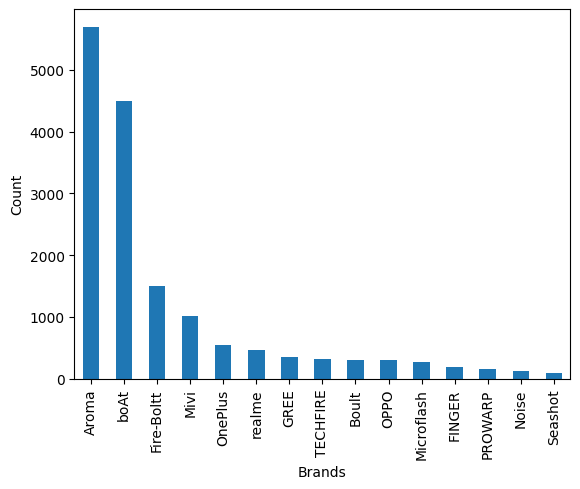

In [4]:
df['Brand']=df['product_title'].str.split().str[0]
df['Brand'].value_counts().plot(kind='bar')
plt.xlabel('Brands')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

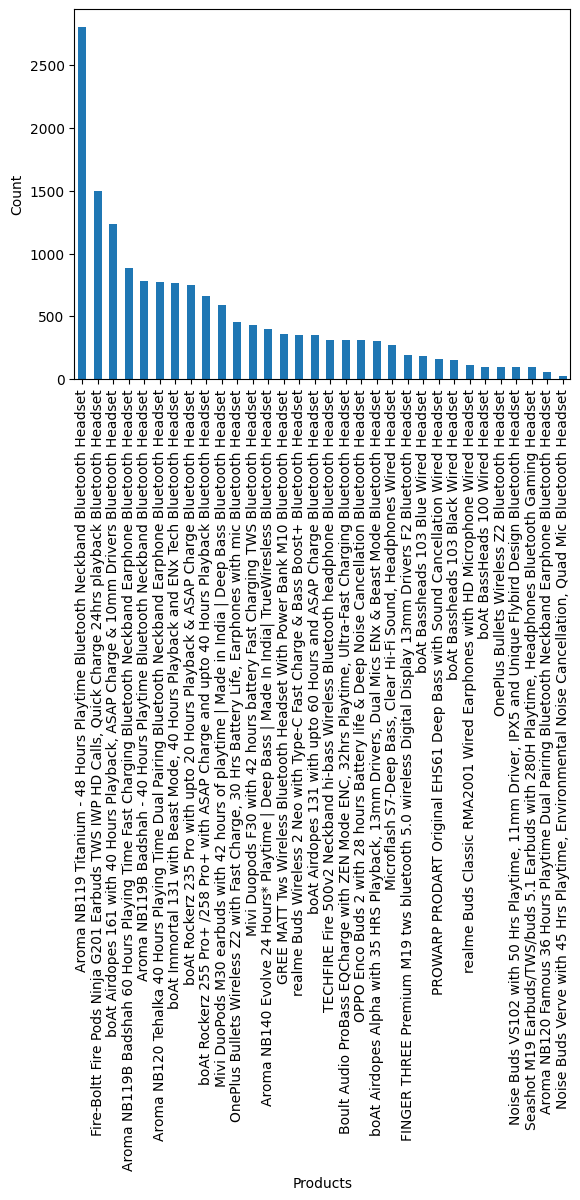

In [5]:
df['product_title'].value_counts().plot(kind='bar')
plt.xlabel('Products')
plt.ylabel('Count')

In [6]:
df['review']=df['review']+' '+df['summary']

In [7]:
data=df[['review','rating']]

In [8]:
data.head()

,review,rating
0,"Pathetic, don't buy this one Terrible product",1
1,It has superb bass and long lasting battery li...,5
2,This item right side earbuds sound very slow a...,1
3,"These earbuds very reliable, very durable and ...",5
4,Nice packing battery life is good it's a good ...,5


In [9]:
data.isnull().sum()

review    60
rating     0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [12]:
data.shape

(15813, 2)

<Axes: xlabel='rating', ylabel='count'>

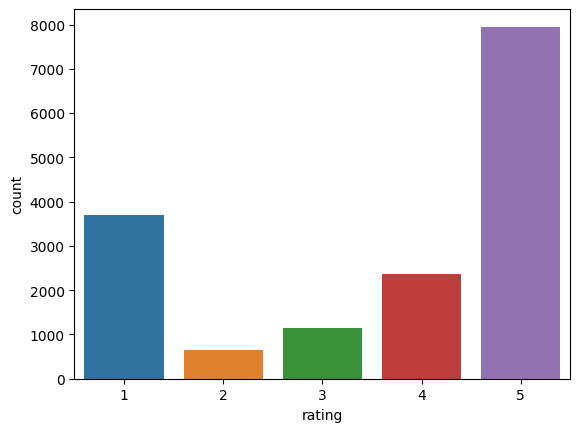

In [13]:
sns.countplot(data=data,x='rating',order=data['rating'].value_counts().sort_index().index)

In [14]:
data["sentiment"] = data["rating"].apply(lambda x: 0 if x < 3  else 1)

In [15]:
data.head()

,review,rating,sentiment
0,"Pathetic, don't buy this one Terrible product",1,0
1,It has superb bass and long lasting battery li...,5,1
2,This item right side earbuds sound very slow a...,1,0
3,"These earbuds very reliable, very durable and ...",5,1
4,Nice packing battery life is good it's a good ...,5,1


In [16]:
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
def text_clean(text):
    text = text.lower()
    text = re.sub('[^a-z A-Z 0-9-]+', '', text)
    stop_words = stopwords.words('english')
    text = " ".join([i for i in text.split() if i not in stop_words or i=='not'])
    text = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(text))
    text= " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [19]:
data["review"] = data["review"].apply(text_clean)
data.head()

,review,rating,sentiment
0,pathetic dont buy one terrible product,1,0
1,superb bass long lasting battery life fabulous,5,1
2,item right side earbuds sound slow volume auto...,1,0
3,earbuds reliable durable last long time earbud...,5,1
4,nice packing battery life good good calling gi...,5,1


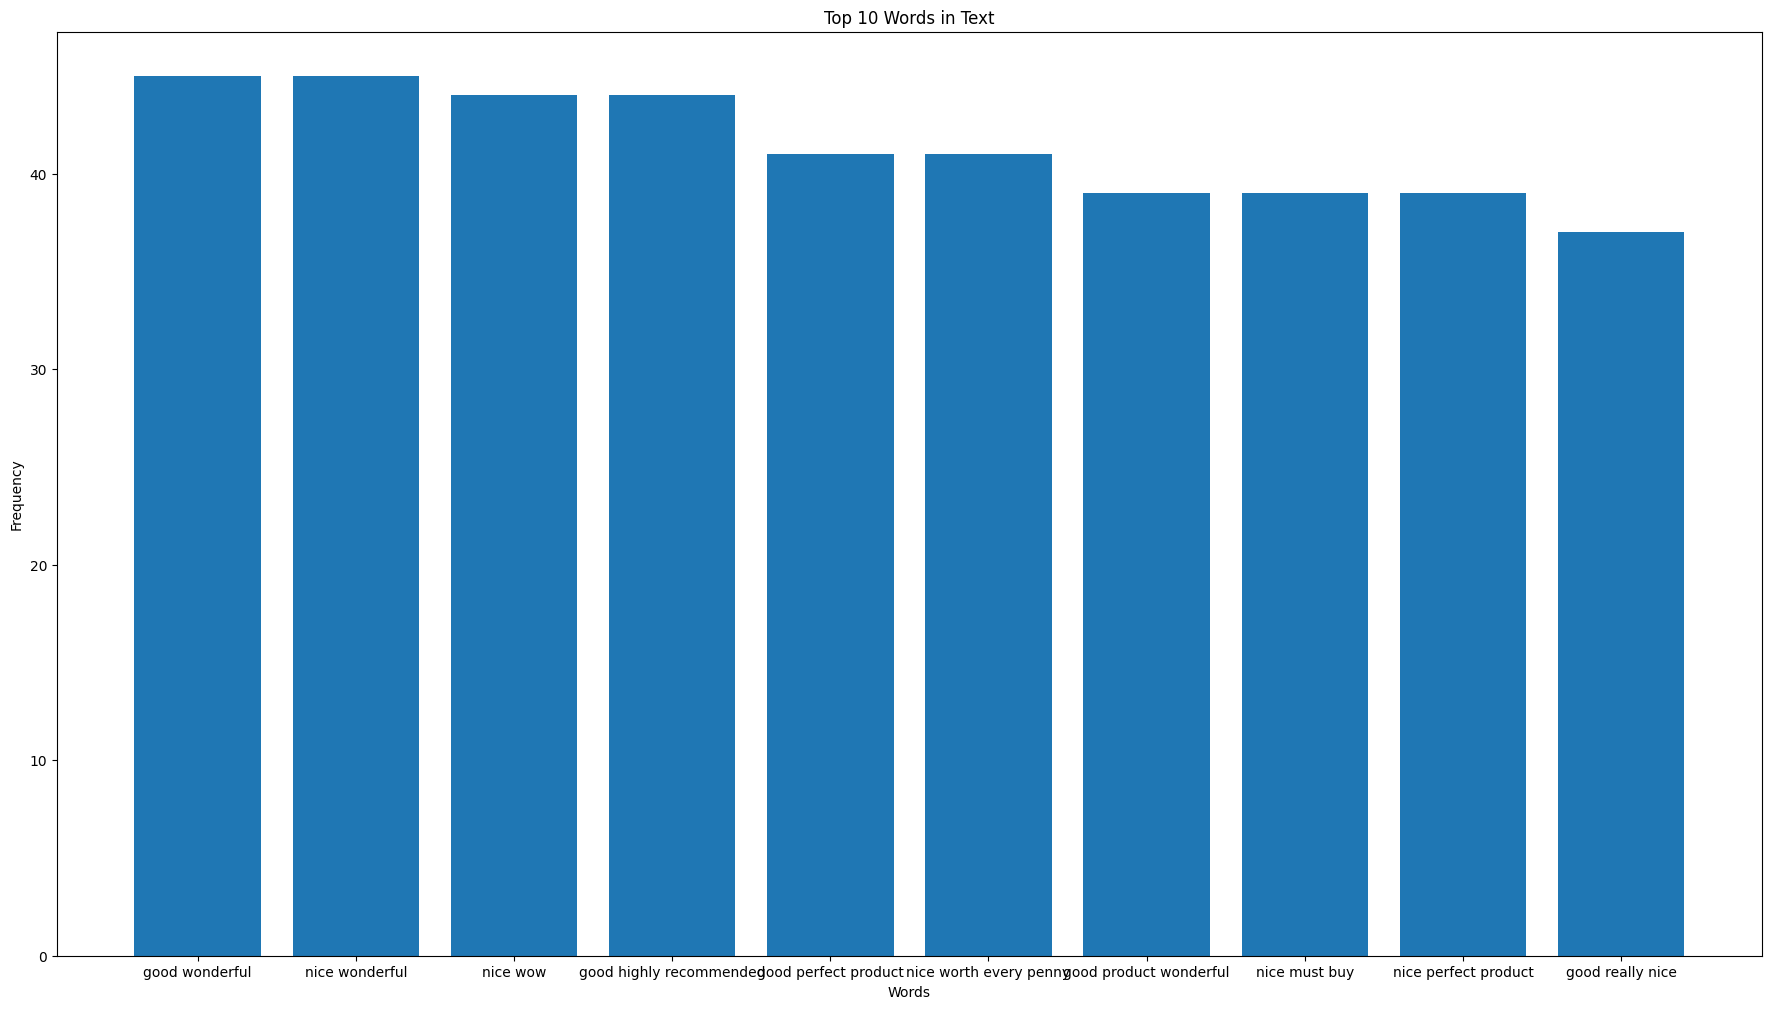

In [20]:
fd = nltk.FreqDist(data['review'])
tw= fd.most_common (10)
lab = [w[0] for w in tw]
val = [w[1] for w in tw]
plt.figure(figsize=(22, 12))
plt.bar(lab, val)
plt.title('Top 10 Words in Text')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

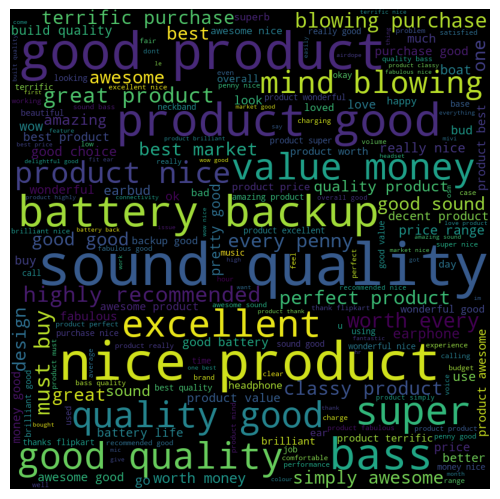

In [21]:
word_cloud_df = data.loc[data['sentiment'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['review']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
#plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

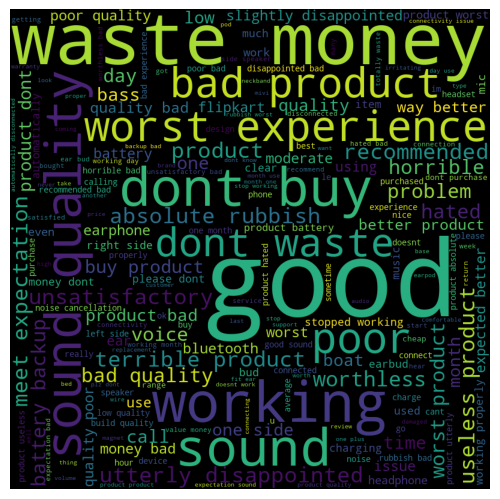

In [22]:
word_cloud_df = data.loc[data['sentiment'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['review']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='black', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
#plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [23]:
data.drop('rating',inplace=True,axis=1)

In [24]:
data.head()

,review,sentiment
0,pathetic dont buy one terrible product,0
1,superb bass long lasting battery life fabulous,1
2,item right side earbuds sound slow volume auto...,0
3,earbuds reliable durable last long time earbud...,1
4,nice packing battery life good good calling gi...,1


In [25]:
data["sentiment"].value_counts()

sentiment
1    11467
0     4346
Name: count, dtype: int64

In [26]:
tfv = TfidfVectorizer()
tfv.fit(data['review'])
X = tfv.transform(data['review']).toarray()

In [27]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'],test_size=0.3,stratify=data['sentiment'],random_state = 42)

In [29]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [30]:
model_dict={0:'Decision Tree', 1:'SVM', 2:'Logistic Regression',
            3:'Random Forest', 4:'Gaussian Naive Bayes', 5:'KNN',
            6:'AdaBoost'}

In [31]:
accuracy=[]

In [33]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_test)
dt_acc=accuracy_score(y_test,pred)
accuracy.append(dt_acc)
print('Accuracy: ',dt_acc)

Accuracy:  0.981239460370995


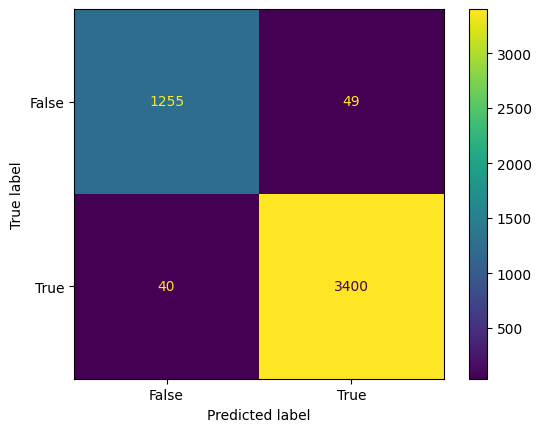

In [31]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

In [60]:
model1 = SVC()
model1.fit(X_train,y_train)

#testing the model
pred = model1.predict(X_test)
svm_acc=accuracy_score(y_test,pred)
accuracy.append(svm_acc)
print('Accuracy: ',svm_acc)

Accuracy:  0.9896711635750421


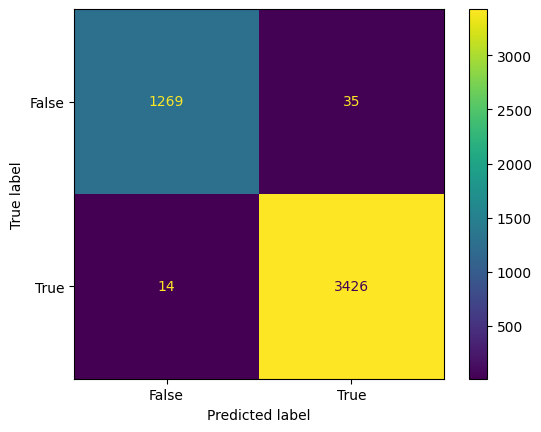

In [33]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [61]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)
  
#testing the model
pred = model2.predict(X_test)
lr_acc=accuracy_score(y_test,pred)
accuracy.append(lr_acc)
print('Accuracy: ',lr_acc)

Accuracy:  0.9846121416526138


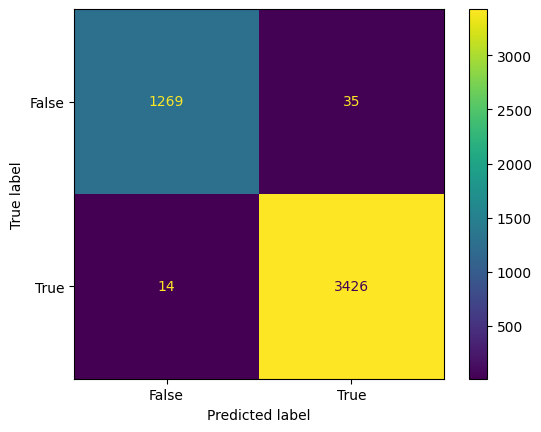

In [36]:
fcm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [34]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
  
#testing the model
pred = model3.predict(X_test)
rf_acc=accuracy_score(y_test,pred)
accuracy.append(rf_acc)
print('Accuracy: ',rf_acc)

In [35]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [63]:
model4 = GaussianNB()
model4.fit(X_train,y_train)
  
#testing the model
pred = model4.predict(X_test)
gnb_acc=accuracy_score(y_test,pred)
accuracy.append(gnb_acc)
print('Accuracy: ',gnb_acc)

Accuracy:  0.5305649241146712


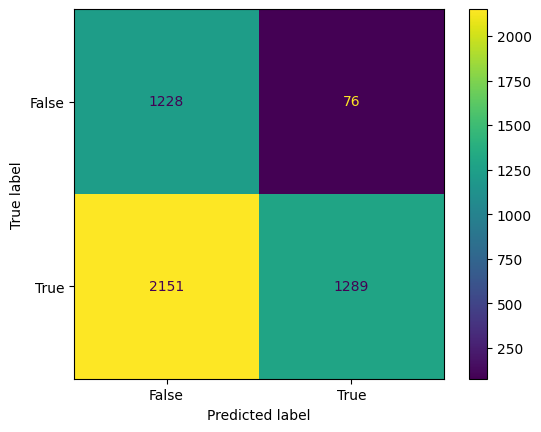

In [40]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [64]:
model5 = KNeighborsClassifier()
model5.fit(X_train,y_train)
  
#testing the model
pred = model5.predict(X_test)
knn_acc=accuracy_score(y_test,pred)
accuracy.append(knn_acc)
print('Accuracy: ',knn_acc)

Accuracy:  0.9639544688026982


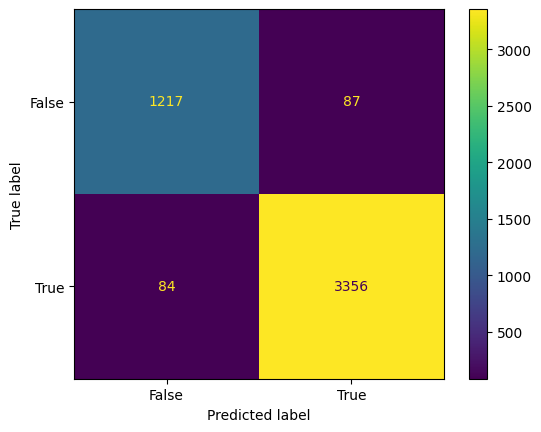

In [42]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [65]:
model6 = AdaBoostClassifier()
model6.fit(X_train,y_train)
  
#testing the model
pred = model6.predict(X_test)
adb_acc=accuracy_score(y_test,pred)
accuracy.append(adb_acc)
print('Accuracy: ',adb_acc)

Accuracy:  0.9822934232715008


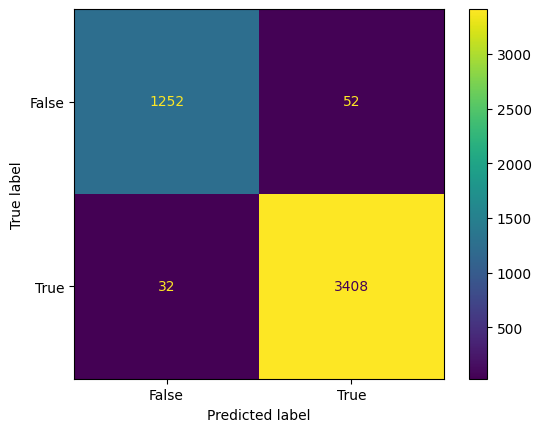

In [44]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [83]:
print("{:<25}{}".format('Model','Accuracy'))
print('--------------------------------------------')
for i,acc in enumerate(accuracy):
    print("{:<25}{}".format(model_dict[i],acc))

Model                    Accuracy
--------------------------------------------
Decision Tree            0.981239460370995
SVM                      0.9896711635750421
Logistic Regression      0.9846121416526138
Random Forest            0.9873524451939292
Gaussian Naive Bayes     0.5305649241146712
KNN                      0.9639544688026982
AdaBoost                 0.9822934232715008


In [85]:
for i,acc in enumerate(accuracy):
    print("{:<40}{}".format(model_dict[i]+' Test Accuracy:',acc))

Decision Tree Test Accuracy:            0.981239460370995
SVM Test Accuracy:                      0.9896711635750421
Logistic Regression Test Accuracy:      0.9846121416526138
Random Forest Test Accuracy:            0.9873524451939292
Gaussian Naive Bayes Test Accuracy:     0.5305649241146712
KNN Test Accuracy:                      0.9639544688026982
AdaBoost Test Accuracy:                 0.9822934232715008


In [48]:
# get a stacking ensemble of models
from sklearn.ensemble import StackingClassifier
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('dtc', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('adb',AdaBoostClassifier()))
    # define meta learner model
    level1 = RandomForestClassifier()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [49]:
model7 = get_stacking()
model7.fit(X_train,y_train)
  
#testing the model
pred = model7.predict(X_test)
pred_acc=accuracy_score(y_test,pred)
print('Accuracy: ',pred_acc)

Accuracy:  0.9903035413153457


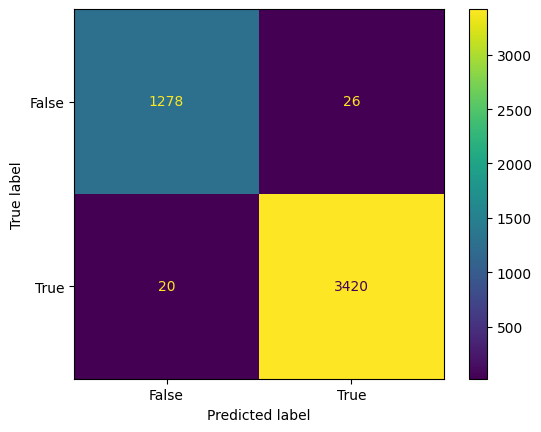

In [50]:
cm = confusion_matrix(y_test,pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
  
cm_display.plot()
plt.show()

In [35]:
import joblib
joblib.dump(model3, 'model.sav')

['model.sav']

In [36]:
import joblib
joblib.dump(tfv, 'tfidf.sav')

['tfidf.sav']